<a href="https://colab.research.google.com/github/gaialeita/ESAME-LEITA/blob/main/esercizio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SECONDA PARTE**

*In questa prima parte viene chiesto di suddividere il catalogo in 5 intervalli di ricchezza e calcolare il redshift, profilo di densita' medio e la sua deviazione standard in funzione di R per ognuno di questi, e mostrare i risultati in un grafico con 5 pannelli.*

In [ ]:
# Installiamo tutte le librerie necessarie
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import emcee
from scipy.stats import norm
from scipy import stats
import corner
from scipy.optimize import minimize
import pygtc
import math

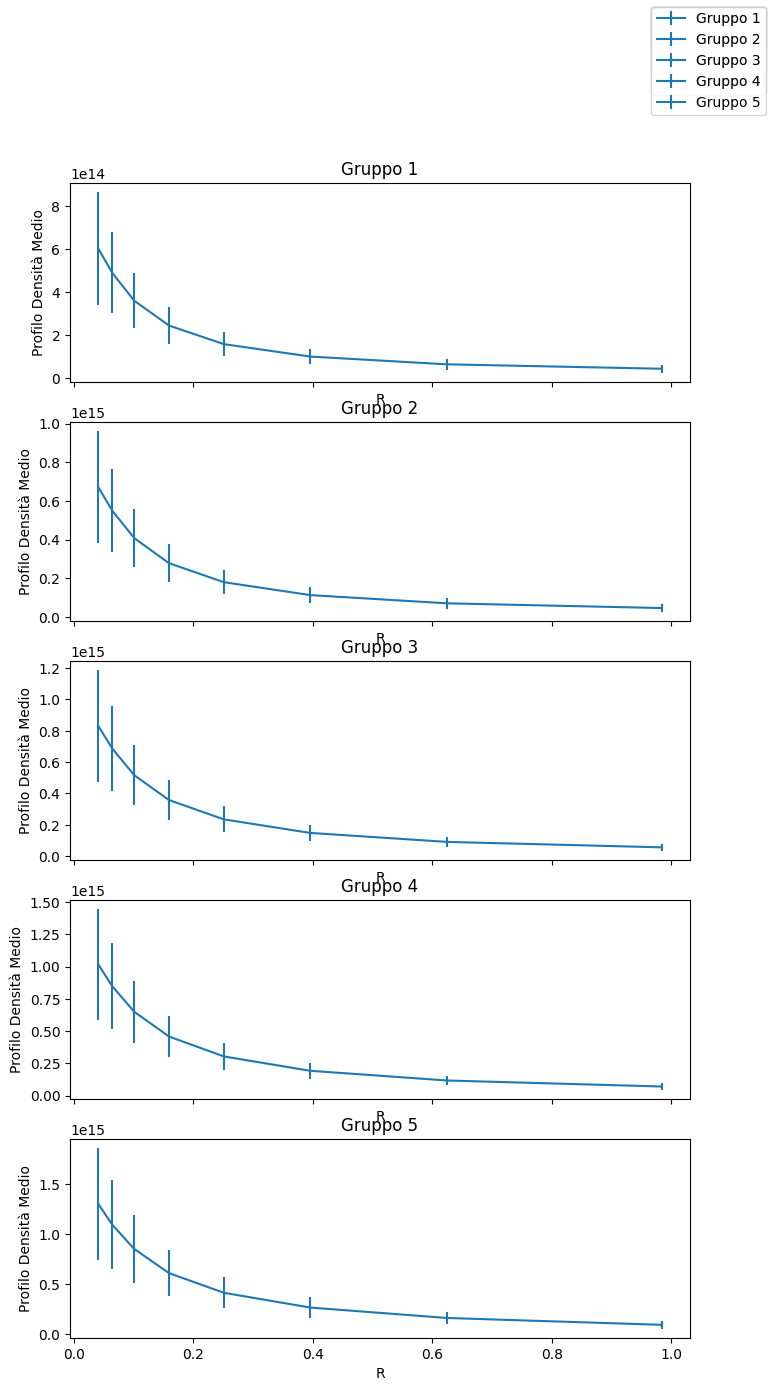

In [ ]:
# Carichiamo i file ed estraiamo le colonne necessarie
catalog_filename = 'halo_catalog.fit'
catalog_data = fits.getdata(catalog_filename)
ricchezza = catalog_data['LAMBDA_TR']
profilo_densita = catalog_data['SIGMA_of_R']
R_values = np.load('R_values.npy')

# Creiamo due array che ci serviranno dopo per salvare i dati
red = np.zeros(5)
prof = np.ndarray((5,8))

# Definiamo gli intervalli di ricchezza come richiesto
intervalli = np.array([15, 20, 30, 45, 60, 200])


fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)

# Ora suddivisiamo il catalogo con i profili di densità in base agli intervalli di ricchezza
# Otteniamo quindi 5 gruppi
for i in range(5):
    if i < 4:
        gruppo = catalog_data[(ricchezza >= intervalli[i]) & (ricchezza < intervalli[i + 1])]
    else:
        gruppo = catalog_data[(ricchezza >= intervalli[i])]



# Per ogni gruppo calcoliamo il redshift medio
    redshift_medio = np.mean(gruppo['Z'])

# Salviamolo all'interno di uno degli array creati prima
    red[i] = redshift_medio

# Calcoliamo ora il profilo di densità per tutte le osservazioni nel gruppo
    profili_densita_gruppo = gruppo['SIGMA_of_R']

 # Calcoliamo il profilo di densità medio e la deviazione standard per il gruppo
    profilo_densita_medio = np.mean(profili_densita_gruppo, axis=0)
# Anche qua salviamo i dati nell'array precedentemente definito
    prof[i] = profilo_densita_medio
    deviazione_standard = np.std(profili_densita_gruppo, axis=0)

# Ora grafichiamo
    axs[i].errorbar(R_values, profilo_densita_medio, yerr=deviazione_standard, label=f'Gruppo {i+1}')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].set_xlabel('R')
    axs[i].set_ylabel('Profilo Densità Medio')


    fig.legend(loc='upper right')

plt.show()


Nell'insieme i grafici evidenziano come il profilo di densità medio cambi nei diversi gruppi, che ricordiamo essere suddivisi in base alla loro ricchezza. Nell'asse x troviamo i valori di R, mentre nelle ordinate i valori del profilo di densità medio.
Vengono inoltre rappresentate anche le deviazioni standard. Esse sono inoltre un utile indice di quanto i valori del profilo di densità si discostano, in media, dalla densità media calcolata per ogni punto di raggio R all'interno di un gruppo.
Infatti viene calcolata una deviazione per ogni gruppo per ogni punto di raggio R - infatti in ogni grafico vediamo 8 deviazioni, ciascuna corrispondente a un diverso valore del raggio.
Le barre più piccole indicano che in quel punto la densità è abbastanza coerente tra le diverse osservazioni del gruppo, viceversa un grande errore indicherà ampie fluttuazioni. Osserviamo anche che le barre di errore si rimpiccioliscono mano a mano che i valori del raggio aumentano.
Notiamo inoltre che, in ogni gruppo, la curva della densità è decrescente: ciò significa che la densità media diminuisce con la distanza dal centro. Nella coda, tuttavia, la diminuzione tende ad essere meno "ripida" di conseguenza la densità media rimane relativamente costante.
Infine, paragonando i grafici relativi ai vari gruppi, possiamo affermare che vi è una certa coerenza nella distribuzione di densità tra i gruppi, poiché nell'insieme appaiono molto simili tra di loro.

-------------------------------------------------------------------------------------- **** -------------------------------------------------------------------------------------

*In questa seconda parte viene richiesto di usare il fit analitico nfw per stimare per ogni bin di ricchezza la massa (log_10(M)) e la concentrazione media c. A tal scopo si assume una likelihood Gaussiana utilizzando le matrici di covarianza fornite per ogni intervallo di ricchezza, e i prior uniformi forniti per i parametri; per ogni bin di ricchezza si utilizza il relativo redshift medio. Usare il sofware emcee per derivare i posteriors sui parametri.*

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
100%|██████████| 5000/5000 [00:35<00:00, 140.96it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: Runti

autocorr_time: [40.53700138 39.29950557]


  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:37<00:00, 132.35it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [45.01218989 42.90788067]


100%|██████████| 5000/5000 [00:33<00:00, 147.96it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [41.79355551 43.02170579]


100%|██████████| 5000/5000 [00:36<00:00, 138.66it/s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


autocorr_time: [45.57942628 42.77212114]


100%|██████████| 5000/5000 [00:34<00:00, 143.23it/s]


autocorr_time: [46.06405493 46.27259198]


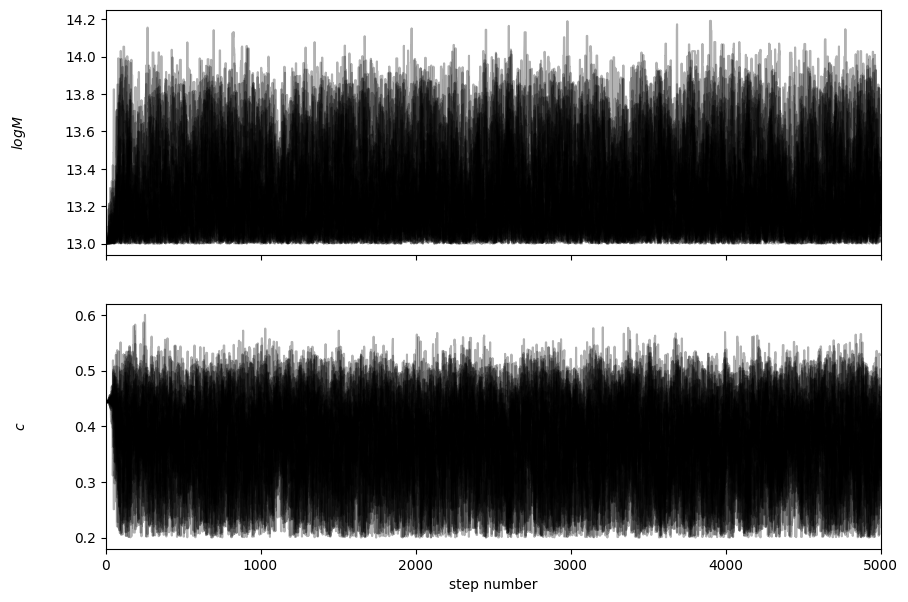

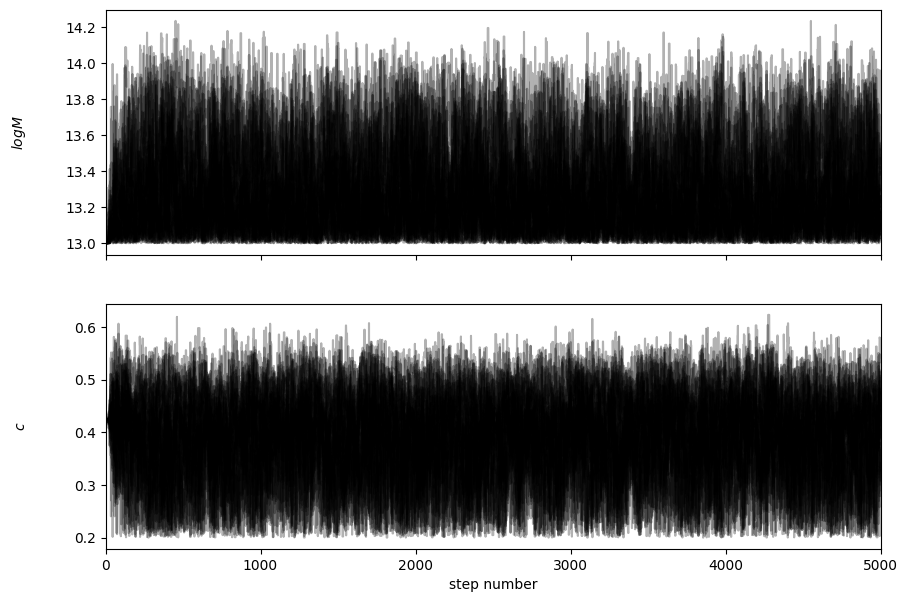

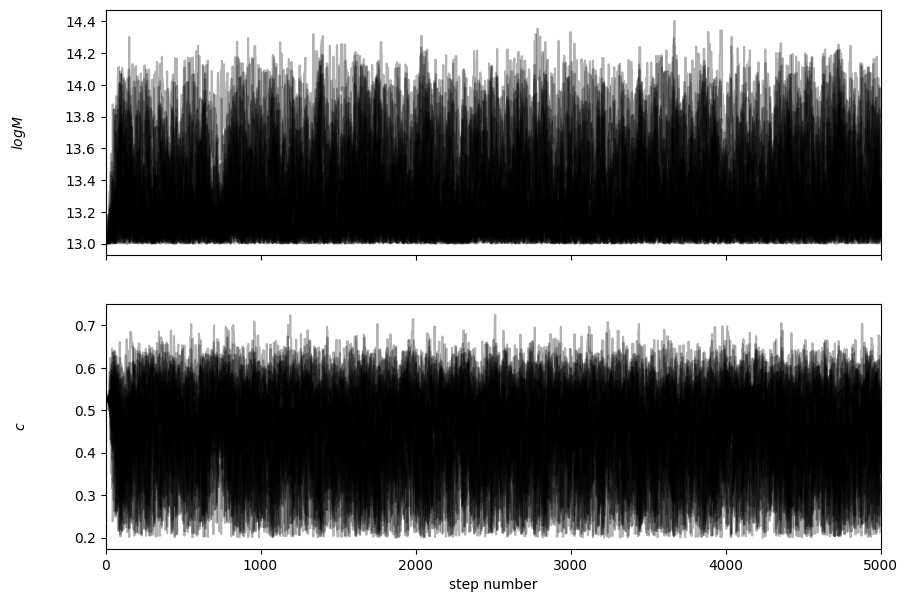

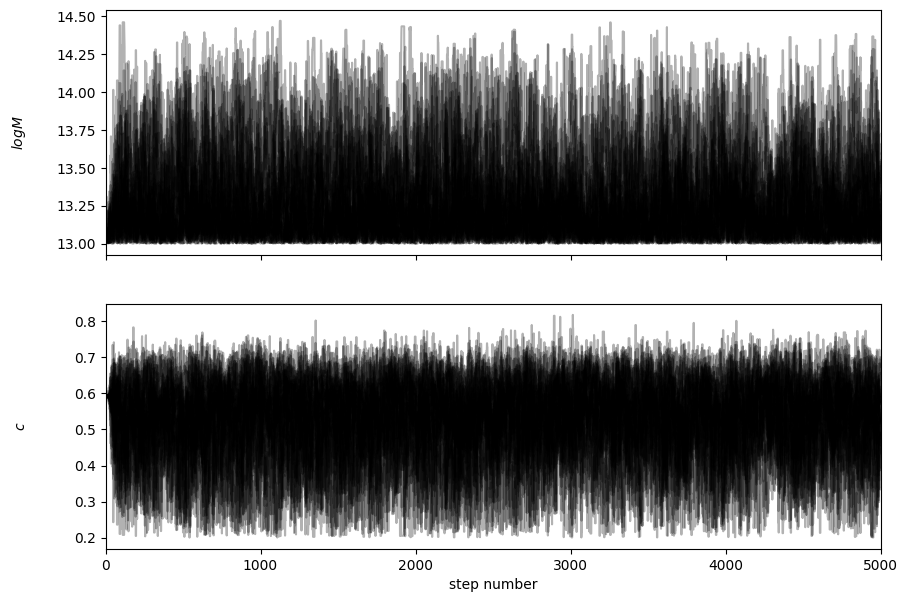

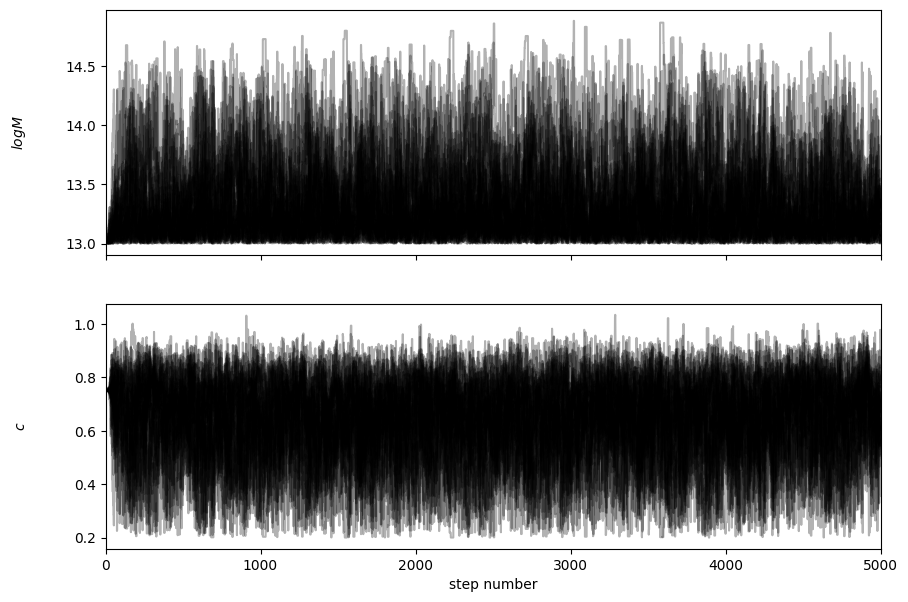

In [ ]:
# Carichiamo i dati richiesti
cov_matrix = np.load('covariance_matrices.npy')

# Ora definiamo la funzione nfw che calcola il profilo di densità di un ammasso
def nfw(R, M, c, z):
    # Definiamo i valori costanti
    rho_m = 0.286 * (2.7751428946 * 10**11) * 0.7**2
    f_c = math.log(1 + c) - (c / (1 + c))
    delta_char = 200 * c**3 / (3 * f_c)
    rho_s = rho_m * delta_char * (1 + z)**3
    # Calcolo di r_s
    r_s = ((3 * M / (4 * np.pi * rho_m* ((1 + z)**3))) ** (1 / 3))
    # Calcolo della funzione f(x)
    x = R / r_s
    f_x = np.zeros_like(x)
    for i in range (len(x)):
      if(x[i]<=1):
        f_x[i]=(1-(2*np.arctanh(math.sqrt((1-x[i])/(1+x[i]))))/(math.sqrt(1-x[i]**2)))/(x**2-1)[i]
      elif(x[i]==1):
        f_x[i]=1/3
      else:
        f_x[i]=(1-(2*np.arctan(math.sqrt((x[i]-1)/(1+x[i]))))/(math.sqrt(x[i]**2-1)))/(x**2-1)[i]

    # Calcolo del profilo di densità
    Sigma = 2 * f_x * r_s * rho_s

    return Sigma


# Ora definiamo la funzione di Likelihood del modello
# Il profilo di densità viene calcolato con la NFW definita sopra
def log_likelihood(theta, r, data, cov_matrix, z):
    logM, c = theta
    M = 10**(logM)
    model = nfw(r, M, c, z)
    diff = data - model
    cov_inv = np.linalg.inv(cov_matrix)
    return -0.5 * np.dot(diff, np.dot(cov_inv, diff))

# Definiamo la log-prior: implementa un prior piatto (uniforme) sui parametri da stimare logM e c.
# Restituisce 0 se i parametri sono nel range definito e -np.inf altrimenti.
def log_prior(theta):
    logM, c = theta
    if 13.0 <= logM <= 16.0 and 0.2 <= c <= 20.0:
        return 0.0
    return -np.inf

# Ora definiamo la log-posterior: è la somma del log-prior e del log-likelihood.
# Se il log-prior è infinito, la log-posterior diventa infinitamente negativa.
def log_posterior(theta, r, data, cov_matrix, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, r, data, cov_matrix, z)

# Inizializziamo degli array per mettere i risultati ad ogni gruppo
results = np.ndarray((5,157440,2)) # 157440 = (5000-70)* 32
bestfit = np.ndarray ((5,2)) # due parametri stimati per ogni gruppo di ricchezza

# Suddividiamo il catalogo in base agli intervalli, come prima
for i in range(5):
    if i < 4:
        gruppo = catalog_data[(ricchezza >= intervalli[i]) & (ricchezza < intervalli[i + 1])]
    else:
        gruppo = catalog_data[(ricchezza >= intervalli[i])]


# Calcoliamo il redshift medio per il gruppo
    redshift_medio = np.mean(gruppo['Z'])
    red[i] = redshift_medio

# Calcoliamo il profilo di densità per tutte le osservazioni nel gruppo
    profili_densita_gruppo = gruppo['SIGMA_of_R']

 # Calcoliamo il profilo di densità medio e la deviazione standard per il gruppo
    profilo_densita_medio = np.mean(profili_densita_gruppo, axis=0)
    prof[i] = profilo_densita_medio
    deviazione_standard = np.std(profili_densita_gruppo, axis=0)


# In questa parte viene definita una funzione nll che restituisce il negativo del log-posterior.
# Viene inizializzato il vettore dei parametri iniziali
# Si effettua una minimizzazione del negativo del log-posterior per ottenere i migliori parametri adattati.


    nll = lambda *args: -log_posterior(*args)

    # Parametri iniziali
    initial = np.array([13.5, 0.5]) * (1 + 0.01 * np.random.randn(2))

    # Minimizzazione per il singolo gruppo
    soln = minimize(nll, initial, args=(R_values, profilo_densita_medio, cov_matrix[i], redshift_medio))
    logM_b, c_b = soln.x
    bestfit[i] = soln.x

# Ora inizializziamo la catena di Markov con i parametri iniziali perturbati.
# Eseguiamo l'Ensemble Sampler di emcee per campionare lo spazio dei parametri.


# Perturbazione dei parametri iniziali per inizializzare i walkers
    pos = soln.x * (1 + 1e-4 * np.random.randn(32,2))
    nwalkers, ndim = pos.shape

# Inizializzazione e esecuzione dell'Ensemble Sampler di emcee
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(R_values, profilo_densita_medio, cov_matrix[i], redshift_medio))
    sampler.run_mcmc(pos, 5000, progress=True)

# Ora troviamo il tempo di autocorrelazione
# Mi serve per capire quanti passaggi effettuare per ottenere una catena relativamente indipendente.
    tau = sampler.get_autocorr_time()
    print("autocorr_time:", tau)

# Otteniamo la "catena appiattita" eliminando la fase di burn-in (parte della catena non ancora convergente).
    flat_samples = sampler.get_chain(discard=80, flat=True)
# Memorizziamo i risultati
    results[i] = flat_samples

# Creiamo due subplot per i parametri della catena Markov.
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    # La linea di codice sotto dice che vengono ottenute le catene di Markov dal sampler.
    # Ogni catena rappresenta una traiettoria per un certo walker.
    samples = sampler.get_chain()
    labels = ["$logM$", "$c$"]

# Creiamo i plot della distribuzione della catena Markov per i parametri.

    for j in range(ndim): # itera attraverso i due parametri
        ax = axes[j] # assegna il subplot corrente alla variabile ax
        ax.plot(samples[:, :, j], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[j])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        axes[-1].set_xlabel("step number");

plt.show()

I plot delle catene di Markov mostrano come i valori dei parametri cambiano nel tempo (passi MCMC) per tutti i walkers.
Le catene oscillano attorno a un certo valore e le traiettorie si sovrappongono, quindi la distribuzione di probabilità risulta essere una buona approssimazione della *posterior distribution*. Inoltre il tempo di autocorrelazione è molto basso rispetto al numero di passi, altro indice di una buona convergenza. La catena scansiona abbastanza uniformemente lo spazio dei parametri. Le catene si concentrano attorno a quella che è la stima più probabile del parametro.


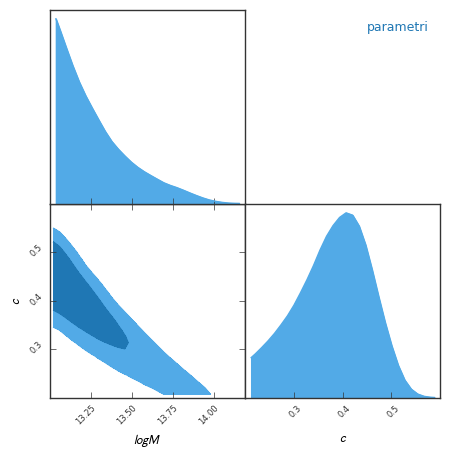

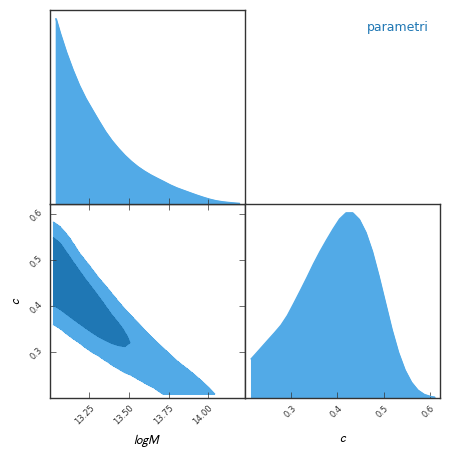

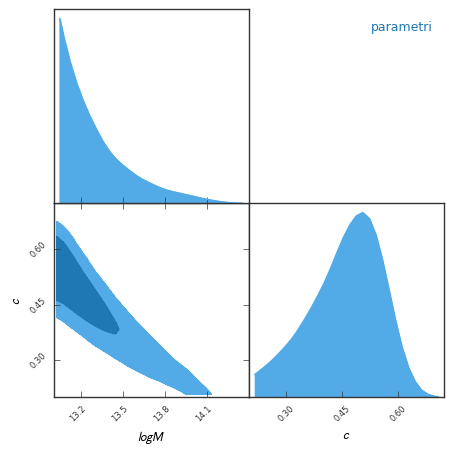

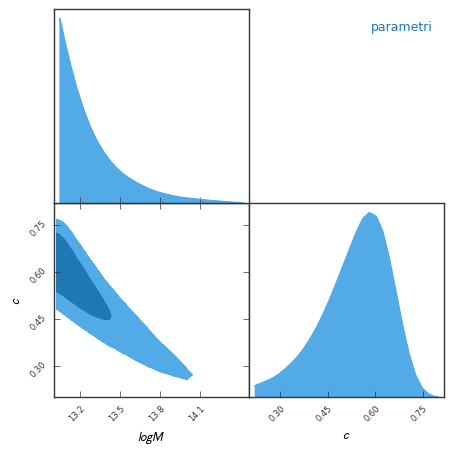

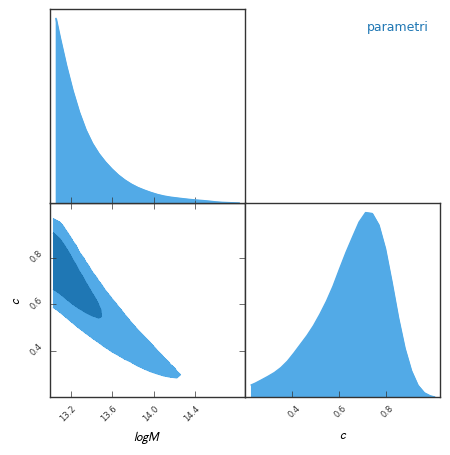

In [ ]:
# Ora procediamo con il plot dei grafici triangolari (corner plots)

for i in range(5): # genero un grafico per ogni intervallo di ricchezza
        GTC = pygtc.plotGTC(chains=results[i], # come imput abbiamo le catene risultanti dal campionamento
                    paramNames=['$logM$','$c$'],
                    chainLabels=['parametri'],
                    figureSize='MNRAS_page')

plt.show()

I grafici triangolari mostrano le distribuzioni marginali e le correlazioni tra i parametri logM e c.



Le celle sulle diagonali rappresentano le distribuzioni marginali dei due parametri: i picchi rappresentano i valori più probabili; da questi grafici è possibile anche ricavare informazioni sulla precisione e sull'attendibilità delle stime. L'altezza del picco determina la probabilità associata alla stima. La larghezza della distribuzione fornisce invece informazioni sull'incertezza del parametro.

Per quanto riguarda i grafici nell'angolo, essi contengono un grafico di dispersione per evidenziare la relazione tra i parametri stimati, in cui ogni punto rappresenta una coppia di valori campionati dai parametri corrispondenti nella catena di Markov. Le dispersioni, inoltre, appaiono ellittiche: questo ci suggerisce che vi è correlazione tra logM e c. Le ellissi hanno tutte inclinazione negativa, che implica una correlazione negativa: quindi valori più alti di logM sono associati a valori più bassi di c.
Infine, le regioni con colore più intenso indicano maggiore probabilità (= la catena ha trascorso più tempo in questa regione). In queste regioni il modello ha una probabilità più alta di generare dati osservati.

-------------------------------------------------------------------------------------- **** -------------------------------------------------------------------------------------

*Riportare il valore di best-fit, il valor medio ed errore associato ad ogni parmetro; fare un grafico triangolare per ogni intervallo di ricchezza per mostrare i posteriors ottenuti sui due parametri. Verificare la bonta' del fit calcolando il chi quadro per i best fit parameters, e confrontando i dati con ~100 valori di M e c estratti dalle catene; commentare i risultati.*

In [ ]:
# Riportiamo i valori dei best fit e calcoliamo media ed errore per ogni gruppo
# Definiamo gli array per media ed errore inizializzati a zero
media_logM = np.zeros(5)
media_c = np.zeros(5)
errore_logM = np.zeros(5)
errore_c = np.zeros(5)

print("RISULTATI OTTENUTI:")
print()

# Ciclo in cui iteriamo per ciascun gruppo di ricchezza
for i in range(5):
    print(f"Parametri di best fit per il gruppo {i+1}: {bestfit[i]}")
    media_logM[i] = np.mean(results[i,:,0])
    media_c[i] = np.mean(results[i,:,1])
    errore_logM[i] = np.std(results[i,:,0])
    errore_c[i] = np.std(results[i,:,1])
    print("Valore medio LogM:", media_logM[i], "Errore:", errore_logM[i])
    print("Valore medio c:", media_c[i], "Errore:", errore_c[i])
    print()

RISULTATI OTTENUTI:

Parametri di best fit per il gruppo 1: [13.00456629  0.44432172]
Valore medio LogM: 13.258856629569912 Errore: 0.21921039379577612
Valore medio c: 0.37746052937761565 Errore: 0.0742518709622992

Parametri di best fit per il gruppo 2: [13.00046338  0.42484174]
Valore medio LogM: 13.273157339932665 Errore: 0.2320119968088377
Valore medio c: 0.39295362242693505 Errore: 0.0808114034256863

Parametri di best fit per il gruppo 3: [13.01365755  0.5240405 ]
Valore medio LogM: 13.27117048246736 Errore: 0.24726634652285406
Valore medio c: 0.4576673669053844 Errore: 0.09638445702308565

Parametri di best fit per il gruppo 4: [13.0452427   0.59317672]
Valore medio LogM: 13.25759824701997 Errore: 0.24890365153982702
Valore medio c: 0.5341683638234037 Errore: 0.10683114680702478

Parametri di best fit per il gruppo 5: [13.00989861  0.75173569]
Valore medio LogM: 13.314311125605855 Errore: 0.3051262769121596
Valore medio c: 0.6520896884992289 Errore: 0.14788126071989638



Osserviamo che i valori medi e i parametri di best fit risultano tutto sommato compatibili, sebbene queste quantità non coincidano completamente. Il fatto che non siano esattamente uguali può dipendere da molteplici fattori, ad esempio un grado di incertezza statistica associabile ad entrambi. Inoltre, l'inizializzazione dei walkers con valori casuali delle perturbazioni può portare a una variabilità nella convergenza del fit. In conclusione quindi ci sono vari punti da tenere in considerazione per spiegare questa leggera differenza di valori.

In [ ]:
# CALCOLO DEL CHI QUADRO PER TESTARE LA BONTA' DELLA STIMA

# Definiamo degli array bidimensionali per memorizzare i dati
profilo_fit = np.ndarray((5,8)) # 5 gruppi x 8 raggi
err = np.ndarray((5,8))
tot = np.ndarray((5,8))

# Iteriamo il calcolo per ogni gruppo
for i in range (5):
  # Consideriamo il profilo di densità stimato per il gruppo i
  # utilizzando il modello NFW con i parametri di best fit ottenuti precedentemente.
    profilo_fit[i] = nfw(R_values, (10**bestfit[i,0]), bestfit[i,1], red[i])
    err[i] = deviazione_standard**2
    # NB: prof[i] = profilo di densità osservato - definito precedentemente
    tot[i] = (prof[i]-profilo_fit[i])**2/err[i]
    chi_squared = np.sum(tot[i])
    print('Chi-quadro per il gruppo', i+1, '=', chi_squared)
    print()




Chi-quadro per il gruppo 1 = 1.4334813687807244

Chi-quadro per il gruppo 2 = 2.158114120717147

Chi-quadro per il gruppo 3 = 3.2164313338826

Chi-quadro per il gruppo 4 = 5.130752762920846

Chi-quadro per il gruppo 5 = 8.155604736880255



Ricordiamoci il significato del Chi Quadro, ossia che valori bassi mi garantiscono la validità dei modelli utilizzati. In questo caso il Chi Quadro risulta complessivamente accettabile, di conseguenza posso considerare i risultati attendibili. Tuttavia, cresce all'aumentare della ricchezza: ciò potrebbe voler dire che il modello si adatta meglio ad ammassi meno ricchi, ma anche in questa circostanza i fattori da prendere in considerazione sono molteplici.

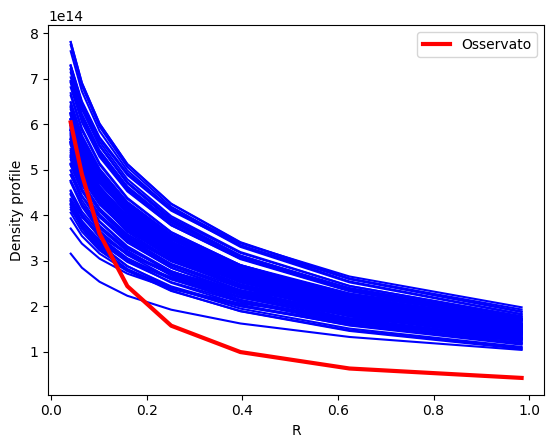

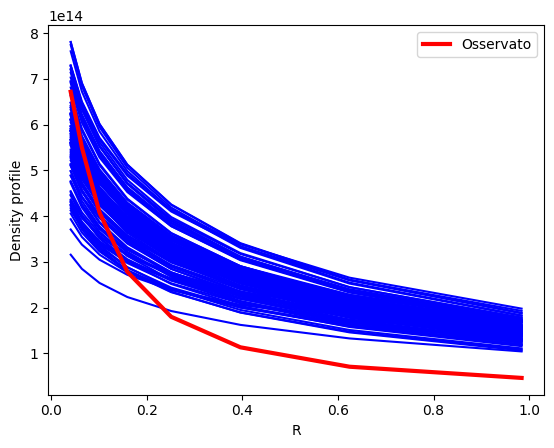

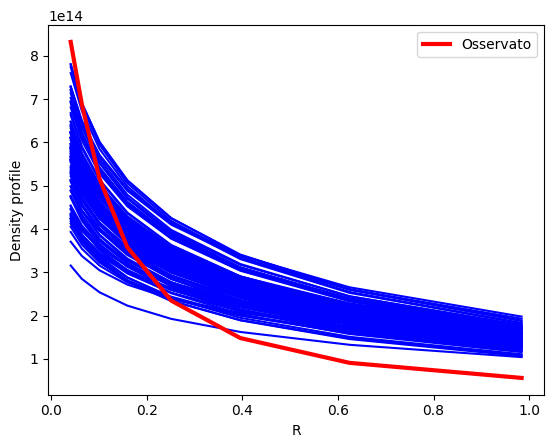

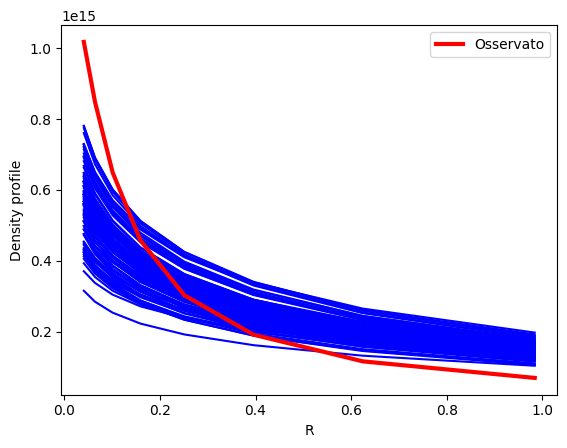

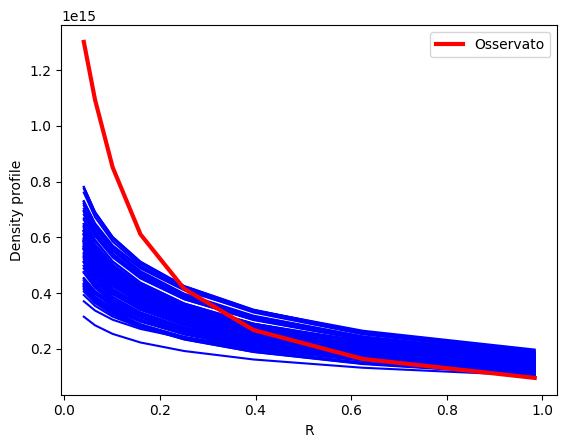

In [ ]:
# PARTE DEL CONFRONTO
# Estraiamo i 100 valori casuali
# per selezionare casualmente 100 campioni dalla catena di Markov per gruppo
random_samples = (np.random.randint(0, 157440, 100))

# Solito loop su ogni gruppo
for i in range(5):
# Array immagazzinare i profili di densità attesi per i 100 valori
  expected = np.ndarray((8, 100))
# Array inizializzati per valori di logM e c estratti dalla catena di Markov per i 100 valori casuali.
  val_logM = np.zeros(100)
  val_c = np.zeros(100)

# Per ciascuno dei 100 valori casuali, estraiamo il valore di logM e
# c dalla catena di Markov e calcoliamo il profilo di densità atteso con la nfw
# Memorizziamo quindi i risultati
  for j in range (100):
    k = random_samples[j]
    val_logM[j] = results[i,k,0]
    val_c[j] = results[i,k,1]
    expected[:,j] = nfw(R_values,10**(val_logM[j]),val_c[j],red[i])

# Plottiamo profilo di densità osservato e atteso per il gruppo corrente
for i in range (5):
# Prendiamo i profili di densità osservati per il gruppo
   observed = prof[i]
   plt.figure()
   plt.plot(R_values, expected, color = 'blue')
   plt.plot(R_values, observed, label = 'Osservato', color = 'red', linewidth = 3)
   plt.xlabel('R')
   plt.ylabel('Density profile')
   plt.legend()
plt.show()



La linea in rosso rappresenta il profilo di densità osservato, mentre quelle in blu rappresentano il profilo di densità atteso calcolato con la NFW per i 100 valori estratti casualmente dalle catene. Notiamo che all'aumentare di R e del gruppo di ricchezza i 100 valori sembrano convergere meglio verso la curva che descrive il profilo di densità osservato.